# Lesson 10 & 11 (from book), Vector Data, Geopandas


## 10.1 Points, lines, and polygons

Vector data represents speciifc features on the Earth’s surface. There are three types of vector data:

Points: each point has a single x,y location. Examples of pointdata that can be represented as point vector data are sampling locations or animal sightings.

Lines: a line is composed of at least two points that are connected. Roads and streams are commonly depicted as line vector data.

Polygons: polygons are sets of three or more vertices that are connected and form a closed region. Political boundaries (outlines of countires, states, cities, etc) are examples of polygon vector data.




In addition to the geospatial information stored, vector data can include attributes that describe each feature. For example, a vector dataset where each feature is a polygon representing the boundary of a state could have as attributes the population and are of the state.



## 10.2 Shapefiles

One of the most popular formats to store vector data is the shapefile data format. The shapefile format is developed and maintained by the Environmental Systems Research Institute (Esri).

So far we’ve been working with data that comes stored in a single file, like a csv or txt file for tabular data. A shapefile is actually a collection of files that interact together to create a single data file. All the files that make up a shapefile need to have the same name (different extensions) and be in the same directory. For our shapefiles to work we need at least these three files:

- .shp: shape format, this file has the geometries for all features.
- .shx: shape index format, this file indexes the features
- .dbf: attribute format, this file stores the attributes for features as a table
Sometimes shapefiles will have additional files, including:

- .prj: a file containing information about the projection and coordinate reference system
- .sbn and .sbx: files that contian a spatial index of the features
- .shp.xml: geospatial metadata in XML format.
Check the Wikipedia page about shapefiles to see a more extensive list of files associated to shapefiles.

# Intro to geopandas

GeoPandas is a Python library that extends the `pandas` library by adding support for geospatial data. In this lesson we will introduce the `geopandas` library to work with vector data. We will also make our first map.

To begin with, let’s import `geopandas` with its standard abbreviation gpd:

In [1]:
# this is the library we will explore
import geopandas as gpd

# we will start using matplotlib for making maps
import matplotlib.pyplot as plt

In this lesson we will use simplified point data about wild pigs (Sus scrofa) sightings in California, USA from the Global Biodiversity Information Facility. (GBIF)

We can read in a shapefile with geopandas by using the `gpd.read_file()` function.

In [4]:
# read in data using geopandas
# specifying path, thru 'data' folder
# reading .shp, the main shape file
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

# view first 5 rows
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


One shapefile = multiple files

Although the parameter for `gpd.read_file(`) is only the .shp file, remember that we need to have at least the `.shx` and `.dbf` files in the same directory as the `.shp` to read in the data.

## 11.2 GeoSeries and GeoDataFrame
The core data structure in GeoPandas is the `geopandas.GeoDataFrame`. We can think of it as a `pandas.DataFrame` with a dedicated geometry column that can perform spatial operations.

The geometry column in a `gpd.GeoDataFrame` holds the geometry (point, polygon, etc) of each spatial feature. Columns in the `gpd.GeoDataFrame` with attributes about the features are `pandas.Series` like in a regular `pd.DataFrame`.

**Example**

First of all, notice that the leftmost column of `pigs` is a column named `geometry` whose values indicate points.

In [5]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


As usual, we can check the `type` of our objects using the type Python function:

In [7]:
# type of the pigs dataframe
print(type(pigs))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [8]:
# type of the geometry column
print(type(pigs.geometry))

# type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The new data type of the geometry column is also reflected when we look at the data types of the columns in the data frame:



In [9]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

We can also check the type of each element in the geometry column using the `geom_type` attribute of a `gpd.GeoDataFrame`:



In [10]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

## 11.3 Geometric information
Two other important attributes of a `gpd.GeoDataFrame` are its coordinate reference system (CRS) and its extent.

We can think of the **coordinate reference system (CRS)** as the instructions to locate each feature in our dataframe on the surface of the Earth. 

We can access the CRS of a `gpd.GeoDataFrame` using the `crs` attribute:

In [11]:
# access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The **extent** of the geo-dataframe is the **bounding box** covering all the features in our geo-dataframe. This is formed by finding the points that are furthest west, east, south and north.

- bounding box for all features, no matter if they are points, lines, or polygons
![NEON spatial extent of different vector data](https://carmengg.github.io/eds-220-book/images/lesson-8-geopandas/spatial-extent.png)

We access the extent of a `gpd.GeoDataFrame` using the `total_bounds` attribute:

In [12]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

- the output is an array of ([xmin, ymin, xmax, ymax])
- [total_bounds documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.total_bounds.html)

## 11.4 Data wrangling
GeoPandas is conveniently built on top of `pandas`, so we may use everything we have learned about data selection, wrangling, and modification for a `pd.DataFrame`.

**Example**

Suppose we only want to use recent data for wild pig observations. A quick check shows that this dataframe has data since 1818:

In [16]:
# use sort_index() method to order the index
pigs.year.value_counts().sort_index() # descending = true is default

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

We can use our usual data selection to get data from 2020 onwards:



In [19]:
# select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# print length of original data frame
print(len(pigs))

# check length of new dataframe
len(pigs_recent)

1046


606

## 11.5 Plotting

### 11.5.1 plot()

Similarly to a `pd.DataFrame`, a `gpd.GeoDataFrame` has a `plot()` method that we can call directly to create a quick view of our data. The geospatial information of the `gpd.GeoDataFrame` will be used to create the axes of the plot.

**Example**

This is a quick look at our recent pigs data:

<AxesSubplot:>

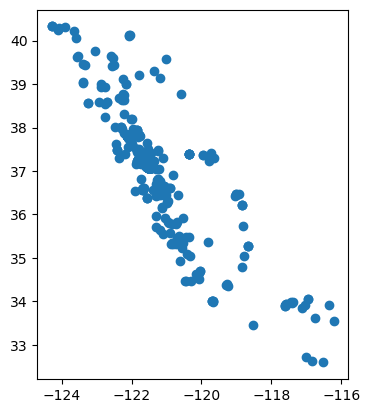

In [20]:
pigs_recent.plot()

### 11.5.2 `matplotlib`’s `fig` and `ax`
Going forward, we will often want to make more complex visualizations where we add different layers to a graph and customize it. To do this we will use the `matplotlib` Python library for creating visualizations. We can interact with `matplotlib` via its `pyplot` interface, which we imported at the top of the notebook as

In [21]:
# import matplotlib with standard abbreviation

import matplotlib.pyplot as plt

Matplotlib graphs the data in a **figure** which can have one or more axes. The axis is only the area specified by the x-y axis and what is plotted in it. To create a new blank figure:

1. Initialize a new figure and axes by calling `pyplot`’s `subplots()` function, and
2. show the graph using `plt.show()`:

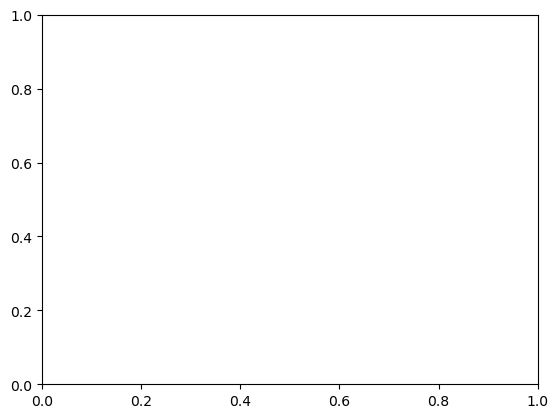

In [22]:
# create a blank figure (fig) with an empty axis (ax)

fig, ax = plt.subplots()

# display figure
plt.show()

Notice we get a figure with a single empty axis. We can think of this step as setting a new blank canvas on which we will paint upon.

#### Functions with multiple return values
Notice that `plt.subplots()` is a function that returns two objects (has two outputs).

### 11.5.3 Adding a layer
When using `matplotlib`, it can be useful to think of creating a plot as adding layers to an axis. The general syntax to plot a datafram `df` onto an axis is:

```
# create new figure and axis
fig, ax = plt.subplots()

# plot df on the ax axis
df.plot(ax=ax, 
        ...)   # other arguments for plot function

# display figure
plt.show()
```

**Example**

The first layer we want to add to our axis is the `pigs_recent` point data. We can plot our data using `matplotlib` like this:

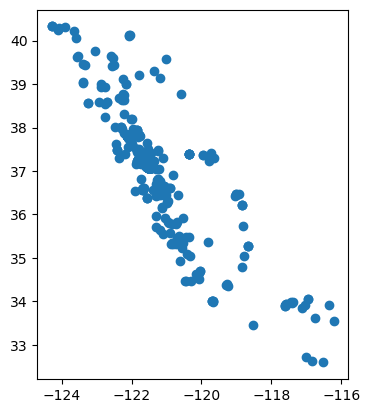

In [26]:
# create new figure and axis
fig, ax = plt.subplots()

# add pigs point plot to our figure's axis
pigs_recent.plot(ax = ax)

# display figure
plt.show()

### 11.5.4 Customization
Matplotlib allows for a lot of customization. Some of it can be done directly in the `plot()` method for the dataframe (like we’ve done when ploting data using `pandas`), while other is done by updating attributes of the axis `ax`. There is an image on the class website/book that shows some examples of elements in the axis that can be updated ![here](https://carmengg.github.io/eds-220-book/images/lesson-8-geopandas/anatomy.png)

**Example**

Some basic customization for our pigs data could looke like this:

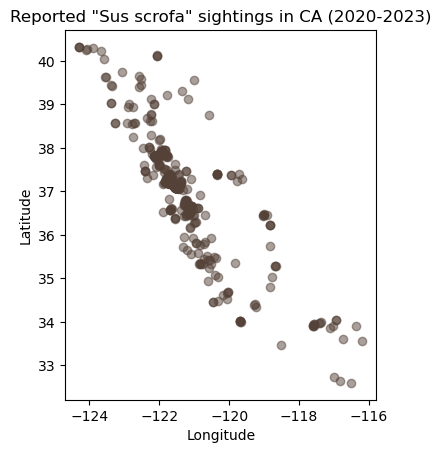

In [38]:
# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
pigs_recent.plot(ax=ax,
                 alpha=0.5,
                 color=(0.33, 0.26, 0.22)
                # color=(0.27, 0.20, 0.16)
                 )

# update axis 
# customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()

![CA wild pig](https://wildlife.ca.gov/portals/0/Images/Game/WildPig/wild-pig_AdobeStock_196733375.jpg)

## Exercises
1. open the CA boundary shapefile and store it as ca_boundary variable. How many features does it have?
2. add it to the pig sightings graph so that the CA boundary appears behind the points.

In [42]:
ca_boundary = gpd.read_file('data/ca-boundary/ca-boundary.shp')

print(ca_boundary.head())

len(ca_boundary)


  REGION DIVISION STATEFP   STATENS GEOID STUSPS        NAME LSAD  MTFCC  \
0      4        9      06  01779778    06     CA  California   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0        A  403501101370  20466718403  +37.1551773  -119.5434183   

                                            geometry  
0  MULTIPOLYGON (((-119.63473 33.26545, -119.6363...  


1

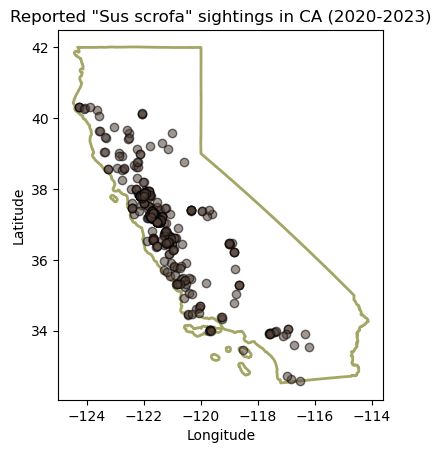

In [53]:
# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()

ca_boundary.plot(ax=ax,
                alpha=0.7,
                color='none',
                edgecolor=(0.49, 0.5, 0.14),
                linewidth=2)

pigs_recent.plot(ax=ax,
                 alpha=0.55,
                 color=(0.33, 0.26, 0.22),
                 edgecolor='black'
                # color=(0.27, 0.20, 0.16)
                 )

# update axis 
# customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()

## 11.6 References
GBIG data: GBIF.org (23 October 2023) GBIF Occurrence Download https://doi.org/10.15468/dl.qavhwp

[Geopandas Documentation - Introduction to GeoPandas](https://geopandas.org/en/stable/getting_started/introduction.html)

[Matplotlib Documentation - Basic Usage](https://matplotlib.org/3.5.3/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

 https://www.neonscience.org/resources/learning-hub/tutorials/intro-vector-data-r